<a href="https://colab.research.google.com/github/ASKG6/Project1/blob/main/DataScience_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Location Mention Recognition (LMR) Project**

### **Objective**  
The goal of this project is to accurately extract location mentions from a given text.


In [ ]:
#Initializng the libraries
import re
import numpy as np
import pandas as pd
import contractions

import warnings
warnings.filterwarnings('ignore')

import spacy
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from spacy import displacy

from sklearn.model_selection import train_test_split



from nltk.corpus import stopwords

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df = pd.read_csv('/content/Train_1.csv')

In [ ]:
df.shape #shape of the dataset

(73072, 3)

In [ ]:
df.isna().sum()/len(df)*100 #text column contains 77.4% null values

,0
tweet_id,0.000000
text,77.490694
location,40.524414


In [ ]:
df[~df['text'].isna()].location.isna().value_counts(normalize=True)

,proportion
location,
False,0.720392
True,0.279608


In [ ]:
df_cleaned = df[~df['text'].isna()]
data = df_cleaned[~df_cleaned['location'].isna()]

In [ ]:
data.head(10) #final dataset

,tweet_id,text,location
1,ID_1001136696589631488,"Flash floods struck a Maryland city on Sunday,...",Maryland
2,ID_1001136950345109504,State of emergency declared for Maryland flood...,Maryland
3,ID_1001137334056833024,Other parts of Maryland also saw significant d...,Baltimore Maryland
4,ID_1001138374923579392,"Catastrophic Flooding Slams Ellicott City, Mar...",Ellicott City Maryland
5,ID_1001138377717157888,WATCH: 1 missing after flash #FLOODING devasta...,Ellicott City Maryland
14,ID_1001141769155891200,Watch Live: Aerials of damage after historic f...,Ellicott City Maryland
17,ID_1001143589630427136,One person is reported missing as a state of e...,Maryland
18,ID_1001143679267098624,Monday May 28 - Morning Report: National Guard...,Arlington Maryland
20,ID_1001144314897018880,One man is still missing after flash flooding ...,Ellicott City Maryland
21,ID_1001144944717914112,RT @KCCINews: State of emergency declared in M...,Maryland


In [ ]:
import spacy
from spacy import displacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def process_text(text):
    doc = nlp(text)  # Running the text through Spacy's NLP pipeline
    # Extracting tokens (words) from the text
    tokens = [token.text for token in doc]  # Iterate over doc.tokens (this is the correct way)
    # Lemmatizing words (ignoring stop words)
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    # Extracting named entities with their labels
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    # Filtering and printing Geopolitical Entities (GPE) from the text
    print([(ent.text) for ent in doc.ents if ent.label_ == "GPE"])  # Displaying only entities labeled as GPE
    # Visualizing named entities using displacy
    displacy.render(doc, style="ent")  # Rendering the named entities in the text visually
    return lemmas  # Returning lemmatized text as an example, you can return whatever you need

trail = data.iloc[0:10]  # Sample data from the DataFrame
trail['Processed_text'] = trail['text'].apply(process_text)  # Processing the text for each entry in 'trail' DataFrame


['Maryland']


['Maryland']


['Maryland', 'Baltimore', 'Dundalk', 'Maryland']


['Maryland']


['Ellicott City', 'Maryland']


['Ellicott City', 'Maryland']


['Maryland']


['Maryland', 'Arlington', 'Via']


['Ellicott City', 'Maryland']


['Maryland']


In [ ]:
location_list = data['location'].unique()

#function to return the locations found in the text
def extract_locations(text, location_list):
    doc = nlp(text)
    locations_found = []
    for ent in doc.ents:
        if ent.label_ == 'GPE' and ent.text in location_list:
            locations_found.append(ent.text)
    return locations_found

#Extracted Locations column gets the locations_found
data['Extracted_Locations'] = data['text'].apply(lambda text: extract_locations(text, location_list))
data['Extracted_Locations'] = data['Extracted_Locations'].apply(lambda x: " ".join(x) if x else "")

In [ ]:
data.head(10)

,tweet_id,text,location,Extracted_Locations
1,ID_1001136696589631488,"Flash floods struck a Maryland city on Sunday,...",Maryland,Maryland
2,ID_1001136950345109504,State of emergency declared for Maryland flood...,Maryland,Maryland
3,ID_1001137334056833024,Other parts of Maryland also saw significant d...,Baltimore Maryland,Maryland Maryland
4,ID_1001138374923579392,"Catastrophic Flooding Slams Ellicott City, Mar...",Ellicott City Maryland,Maryland
5,ID_1001138377717157888,WATCH: 1 missing after flash #FLOODING devasta...,Ellicott City Maryland,Ellicott City Maryland
14,ID_1001141769155891200,Watch Live: Aerials of damage after historic f...,Ellicott City Maryland,Ellicott City Maryland
17,ID_1001143589630427136,One person is reported missing as a state of e...,Maryland,Maryland
18,ID_1001143679267098624,Monday May 28 - Morning Report: National Guard...,Arlington Maryland,Maryland Arlington
20,ID_1001144314897018880,One man is still missing after flash flooding ...,Ellicott City Maryland,Ellicott City Maryland
21,ID_1001144944717914112,RT @KCCINews: State of emergency declared in M...,Maryland,Maryland


In [ ]:
#Preprocessing the text
class CustomTextPreprocessor:
    def __init__(self):
        # Load the spaCy English model for lemmatization
        self.nlp = spacy.load('en_core_web_sm')
        self.stopwords = set(stopwords.words('english'))

    def clean_text(self, text):
        # Cleaning the text by removing HTML tags, special characters, digits, and URLs
        if not isinstance(text, str):
            text = str(text)
        # Remove HTML tags using regex
        text = re.sub(r'<.*?>', '', text)
        # Remove URLs using regex
        text = re.sub(r'http\S+|www.\S+', '', text)
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^\x00-\x7F]+', '', text) # Remove non-ASCII characters
        text = re.sub(r'\d+', '', text)  # Remove digits
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        text = contractions.fix(text)  # Expand contractions
        return text

    def tokenize_text(self, text):
        # Tokenizing the text into individual words
        doc = self.nlp(text)
        return [token.text for token in doc]

    def remove_stopwords(self, words):
        # Removeing stopwords (common words like 'the', 'is', etc.)
        return [word for word in words if word not in self.stopwords]

    def lemmatize_words(self, words):
        # Lemmatizing words using spaCy's lemmatizer
        doc = self.nlp(" ".join(words))
        return [token.lemma_ for token in doc]

    def generate_ngrams(self, words, n=2):
        # Generate n-grams
        return [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]

    def preprocess_text(self, text, use_ngrams=False):
        # Cleaning and process the text
        text = self.clean_text(text)
        words = self.tokenize_text(text)
        words = self.remove_stopwords(words)
        words = self.lemmatize_words(words)
        words = [word for word in words if word.isalpha()]  # Remove non-alphabetic characters

        cleaned_text = " ".join(words)

        if use_ngrams:
            ngrams = self.generate_ngrams(words)
            cleaned_text += " " + " ".join(ngrams)  # Append n-grams to the text

        return cleaned_text

    def preprocess_dataframe(self, df, text_column, use_ngrams=False):
        # Apply the preprocessing function to a column in a pandas DataFrame
        df['cleaned_text'] = df[text_column].apply(lambda x: self.preprocess_text(x, use_ngrams=use_ngrams))
        return df

In [ ]:
#Calling the CustomTextProcessor Class
processor = CustomTextPreprocessor()
processor.preprocess_dataframe(data, 'text', use_ngrams=False)

In [ ]:
data

,tweet_id,text,location,Extracted_Locations,cleaned_text
1,ID_1001136696589631488,"Flash floods struck a Maryland city on Sunday,...",Maryland,Maryland,flash flood strike maryland city sunday washin...
2,ID_1001136950345109504,State of emergency declared for Maryland flood...,Maryland,Maryland,state emergency declare maryland flooding via ...
3,ID_1001137334056833024,Other parts of Maryland also saw significant d...,Baltimore Maryland,Maryland Maryland,part maryland also see significant damage sund...
4,ID_1001138374923579392,"Catastrophic Flooding Slams Ellicott City, Mar...",Ellicott City Maryland,Maryland,catastrophic flooding slams ellicott city mary...
5,ID_1001138377717157888,WATCH: 1 missing after flash #FLOODING devasta...,Ellicott City Maryland,Ellicott City Maryland,watch miss flash flooding devastate ellicott c...
...,...,...,...,...,...
73066,ID_916080760276299776,Mexico City: at least a thousand buildings dam...,Mexico City,Mexico City,mexico city least thousand building damage sep...
73068,ID_916125408059445248,Rescue workers recover the body of the last pe...,Mexico City,Mexico City,rescue worker recover body last person know mi...
73069,ID_916135932285341696,Donate from Facebook to Mexico Earthquake Reli...,Mexico,,donate facebook mexico earthquake relief
73070,ID_916146805347356672,We are helping our clients in Mexico recover f...,Mexico,Mexico,help client mexico recover earthquake proud he...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_texts = data['cleaned_text']

# Initializing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features= 2000, stop_words='english', min_df=5, ngram_range=(1,2))

# Fit and transform the cleaned_text column to TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_texts)

# Convert tfidf_matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head() #sparse matrix (we are not gonna to use this)

,aaron,abaco,abc,able,abroad,accept,accept donation,access,accord,account,...,young,youth,youtube,zealand,zealand earthquake,zimbabwe,zimbabwe cycloneidai,zimbabwe malawi,zimbabwean,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.390643,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from gensim.models import Word2Vec
import nltk

# Tokenize each cleaned sentence into words
tokenized_texts = [nltk.word_tokenize(sentence) for sentence in cleaned_texts]

# Initializing and training the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)

# Define a function to compute the sentence vector by averaging word vectors
def sentence_vector(sentence):
    words = nltk.word_tokenize(sentence)
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)  # zero vector if no words are in vocab

# Applying the sentence_vector function to the cleaned_text column
data['word2vec_sentence_vector'] = data['cleaned_text'].apply(sentence_vector)
data[['cleaned_text', 'word2vec_sentence_vector']].head()

,cleaned_text,word2vec_sentence_vector
1,flash flood strike maryland city sunday washin...,"[0.014622333, 0.4801059, 0.24540503, -0.227530..."
2,state emergency declare maryland flooding via ...,"[-0.082988866, 0.3288186, 0.18033873, -0.46255..."
3,part maryland also see significant damage sund...,"[-0.04395787, 0.46000805, 0.27243042, -0.22340..."
4,catastrophic flooding slams ellicott city mary...,"[0.051004704, 0.5497473, 0.30971554, -0.230032..."
5,watch miss flash flooding devastate ellicott c...,"[0.13501549, 0.70014346, 0.42137134, -0.155703..."


In [ ]:
data.head()

,tweet_id,text,location,Extracted_Locations,cleaned_text,word2vec_sentence_vector
1,ID_1001136696589631488,"Flash floods struck a Maryland city on Sunday,...",Maryland,Maryland,flash flood strike maryland city sunday washin...,"[0.014622333, 0.4801059, 0.24540503, -0.227530..."
2,ID_1001136950345109504,State of emergency declared for Maryland flood...,Maryland,Maryland,state emergency declare maryland flooding via ...,"[-0.082988866, 0.3288186, 0.18033873, -0.46255..."
3,ID_1001137334056833024,Other parts of Maryland also saw significant d...,Baltimore Maryland,Maryland Maryland,part maryland also see significant damage sund...,"[-0.04395787, 0.46000805, 0.27243042, -0.22340..."
4,ID_1001138374923579392,"Catastrophic Flooding Slams Ellicott City, Mar...",Ellicott City Maryland,Maryland,catastrophic flooding slams ellicott city mary...,"[0.051004704, 0.5497473, 0.30971554, -0.230032..."
5,ID_1001138377717157888,WATCH: 1 missing after flash #FLOODING devasta...,Ellicott City Maryland,Ellicott City Maryland,watch miss flash flooding devastate ellicott c...,"[0.13501549, 0.70014346, 0.42137134, -0.155703..."


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

#Encoding clean_text to embeddings
data['Sentence_Vector'] = data['cleaned_text'].apply(lambda text: model.encode(text))

# Encoding all unique locations into embeddings
unique_locations = data['location'].unique()
location_embeddings = {loc: model.encode(loc) for loc in unique_locations}

In [ ]:
data['location_embeddings'] = data['location'].map(location_embeddings)

In [ ]:
data.head(10)

,tweet_id,text,location,Extracted_Locations,cleaned_text,word2vec_sentence_vector,Sentence_Vector,location_embeddings
1,ID_1001136696589631488,"Flash floods struck a Maryland city on Sunday,...",Maryland,Maryland,flash flood strike maryland city sunday washin...,"[0.014622333, 0.4801059, 0.24540503, -0.227530...","[-0.030356904, 0.061293215, 0.1918581, -0.0235...","[-0.005444886, 0.08049059, 0.07565147, 0.00486..."
2,ID_1001136950345109504,State of emergency declared for Maryland flood...,Maryland,Maryland,state emergency declare maryland flooding via ...,"[-0.082988866, 0.3288186, 0.18033873, -0.46255...","[-0.044292577, 0.007215164, 0.12488516, -0.046...","[-0.005444886, 0.08049059, 0.07565147, 0.00486..."
3,ID_1001137334056833024,Other parts of Maryland also saw significant d...,Baltimore Maryland,Maryland Maryland,part maryland also see significant damage sund...,"[-0.04395787, 0.46000805, 0.27243042, -0.22340...","[0.025748802, 0.06049749, 0.19936205, 0.024659...","[-0.013829247, 0.0915759, 0.036991842, 0.01996..."
4,ID_1001138374923579392,"Catastrophic Flooding Slams Ellicott City, Mar...",Ellicott City Maryland,Maryland,catastrophic flooding slams ellicott city mary...,"[0.051004704, 0.5497473, 0.30971554, -0.230032...","[-0.057386544, 0.01105073, 0.1540458, 0.018459...","[0.022848496, 0.05929812, 0.05042855, 0.002516..."
5,ID_1001138377717157888,WATCH: 1 missing after flash #FLOODING devasta...,Ellicott City Maryland,Ellicott City Maryland,watch miss flash flooding devastate ellicott c...,"[0.13501549, 0.70014346, 0.42137134, -0.155703...","[-0.035118368, -0.01769819, 0.118208826, 0.044...","[0.022848496, 0.05929812, 0.05042855, 0.002516..."
14,ID_1001141769155891200,Watch Live: Aerials of damage after historic f...,Ellicott City Maryland,Ellicott City Maryland,watch live aerial damage historic flash floodi...,"[0.021139052, 0.6055399, 0.37440336, -0.245529...","[-0.01273654, 0.034667663, 0.13555084, 0.03268...","[0.022848496, 0.05929812, 0.05042855, 0.002516..."
17,ID_1001143589630427136,One person is reported missing as a state of e...,Maryland,Maryland,one person report miss state emergency declare...,"[0.045335, 0.59696347, 0.35074615, -0.22928303...","[-0.058114473, 0.09390968, 0.100818135, 0.0812...","[-0.005444886, 0.08049059, 0.07565147, 0.00486..."
18,ID_1001143679267098624,Monday May 28 - Morning Report: National Guard...,Arlington Maryland,Maryland Arlington,monday may morning report national guardsman m...,"[0.020592554, 0.48398817, 0.27216947, -0.13845...","[0.013504986, 0.11860057, 0.10604657, 0.000526...","[0.015255822, 0.063745685, 0.06698239, -0.0074..."
20,ID_1001144314897018880,One man is still missing after flash flooding ...,Ellicott City Maryland,Ellicott City Maryland,one man still miss flash flooding tear histori...,"[0.10077465, 0.6656891, 0.39176732, -0.1390987...","[0.02864953, 0.040312342, 0.16162115, 0.057169...","[0.022848496, 0.05929812, 0.05042855, 0.002516..."
21,ID_1001144944717914112,RT @KCCINews: State of emergency declared in M...,Maryland,Maryland,rt kccinews state emergency declare maryland h...,"[-0.12442394, 0.38276565, 0.21300036, -0.46478...","[-0.027338965, 0.07285673, 0.16375431, -0.0065...","[-0.005444886, 0.08049059, 0.07565147, 0.00486..."


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

sample_data = data.iloc[0:1500] # Selecting the first 1500 rows of the data for quicker processing

def predict_location(text_vector):
  # Compute cosine similarity between the text embedding and all location embeddings
  similarities = {loc: cosine_similarity([text_vector], [vec]) for loc, vec in location_embeddings.items()}
  return max(similarities, key=similarities.get)  # Return the most similar location

# Predict location for each test example
sample_data['predicted_location'] = sample_data['Sentence_Vector'].apply(predict_location)

In [ ]:
sample_data[['location', 'predicted_location']].head(20)

,location,predicted_location
1,Maryland,Flooded roads
2,Maryland,Maryland
3,Baltimore Maryland,Flooded roads
4,Ellicott City Maryland,Ellicott City Marylands Patapsco River
5,Ellicott City Maryland,Ellicott City Marylands Patapsco River
14,Ellicott City Maryland,Ellicott City Marylands Patapsco River
17,Maryland,Arkansas Maryland
18,Arlington Maryland,Arlington Maryland
20,Ellicott City Maryland,Ellicott City MD
21,Maryland,Flooded roads


In [ ]:
# Creating a sample data for faster computations rather than processing the whole dataset
sample_data = data.iloc[0:1500]

In [ ]:
from transformers import BertTokenizer, BertForTokenClassification, pipeline

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertForTokenClassification.from_pretrained('dbmdz/bert-large-cased-finetuned-conll03-english')

# Create NER pipeline
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

# Define function to extract locations
def extract_locations(text):
    ner_results = nlp(text)
    words = []
    for result in ner_results:
        if result['entity'] in ['B-LOC', 'I-LOC']:
            # Check if the word starts with '##', indicating a subword token
            if result['word'].startswith("##"):
                # Append the subword to the last word in the list
                words[-1] += result['word'][2:]  # Remove the '##' and append
            else:
                words.append(result['word'])
    return ' '.join(words)


# Apply NER to extract locations
sample_data['BERT_Extracted_Locations'] = sample_data['text'].apply(lambda x: extract_locations(x) if isinstance(x, str) else '')
print("accuarcy is", accuracy_score(sample_data['location'], sample_data['BERT_Extracted_Locations']))

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


accuarcy is 0.5666666666666667


In [ ]:
sample_data[['location','BERT_Extracted_Locations']].head(20)

,location,BERT_Extracted_Locations
0,Maryland,Maryland
1,Maryland,Maryland
2,Baltimore Maryland,Maryland Baltimore Dundalk Catonsville Maryland
3,Ellicott City Maryland,Ellicott City Maryland
4,Ellicott City Maryland,Ellicott City Maryland
5,Ellicott City Maryland,Ellicott City Maryland
6,Maryland,Maryland
7,Arlington Maryland,Maryland Arlington
8,Ellicott City Maryland,Main Street Ellicott City Maryland
9,Maryland,Maryland


In [ ]:
import stanza

# Initializing the Stanza pipeline
stanza.download('en')
nlp = stanza.Pipeline('en', processors='tokenize, ner')

# Define a function to extract locations
def extract_locations_stanza(text):
    doc = nlp(text)
    return ' '.join(ent.text for ent in doc.entities if ent.type == "GPE")

# Apply NER to extract locations
sample_data['stanza_Extracted_Locations'] = sample_data['text'].apply(lambda x: extract_locations_stanza(x) if isinstance(x, str) else '')
print("accuarcy is", accuracy_score(sample_data['location'], sample_data['stanza_Extracted_Locations']))

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


accuarcy is 0.7


In [ ]:
sample_data[['location','stanza_Extracted_Locations']].head(20)

,location,stanza_Extracted_Locations
1,Maryland,Maryland
2,Maryland,Maryland
3,Baltimore Maryland,Maryland Baltimore Dundalk Catonsville Maryland
4,Ellicott City Maryland,Ellicott City Maryland
5,Ellicott City Maryland,Ellicott City Maryland
14,Ellicott City Maryland,Ellicott City Maryland
17,Maryland,Maryland
18,Arlington Maryland,Maryland Arlington
20,Ellicott City Maryland,Ellicott City Maryland
21,Maryland,Maryland


In [ ]:
data['stanza_Extracted_Locations'] = data['text'].apply(lambda x: extract_locations_stanza(x) if isinstance(x, str) else '')

,tweet_id,text,location,Extracted_Locations,cleaned_text,word2vec_sentence_vector,Sentence_Vector,location_embeddings
1,ID_1001136696589631488,"Flash floods struck a Maryland city on Sunday,...",Maryland,Maryland,flash flood strike maryland city sunday washin...,"[0.014622333, 0.4801059, 0.24540503, -0.227530...","[-0.030356904, 0.061293215, 0.1918581, -0.0235...","[-0.005444886, 0.08049059, 0.07565147, 0.00486..."
2,ID_1001136950345109504,State of emergency declared for Maryland flood...,Maryland,Maryland,state emergency declare maryland flooding via ...,"[-0.082988866, 0.3288186, 0.18033873, -0.46255...","[-0.044292577, 0.007215164, 0.12488516, -0.046...","[-0.005444886, 0.08049059, 0.07565147, 0.00486..."
3,ID_1001137334056833024,Other parts of Maryland also saw significant d...,Baltimore Maryland,Maryland Maryland,part maryland also see significant damage sund...,"[-0.04395787, 0.46000805, 0.27243042, -0.22340...","[0.025748802, 0.06049749, 0.19936205, 0.024659...","[-0.013829247, 0.0915759, 0.036991842, 0.01996..."
4,ID_1001138374923579392,"Catastrophic Flooding Slams Ellicott City, Mar...",Ellicott City Maryland,Maryland,catastrophic flooding slams ellicott city mary...,"[0.051004704, 0.5497473, 0.30971554, -0.230032...","[-0.057386544, 0.01105073, 0.1540458, 0.018459...","[0.022848496, 0.05929812, 0.05042855, 0.002516..."
5,ID_1001138377717157888,WATCH: 1 missing after flash #FLOODING devasta...,Ellicott City Maryland,Ellicott City Maryland,watch miss flash flooding devastate ellicott c...,"[0.13501549, 0.70014346, 0.42137134, -0.155703...","[-0.035118368, -0.01769819, 0.118208826, 0.044...","[0.022848496, 0.05929812, 0.05042855, 0.002516..."
...,...,...,...,...,...,...,...,...
73066,ID_916080760276299776,Mexico City: at least a thousand buildings dam...,Mexico City,Mexico City,mexico city least thousand building damage sep...,"[0.14271012, 0.8568089, 0.4928024, 0.03747693,...","[0.031784665, 0.06777544, 0.0921376, 0.0338269...","[0.033580285, 0.10151272, -0.036496148, 0.1005..."
73068,ID_916125408059445248,Rescue workers recover the body of the last pe...,Mexico City,Mexico City,rescue worker recover body last person know mi...,"[0.23406042, 0.88927704, 0.47286776, -0.010305...","[-0.03543016, 0.05234041, 0.05719543, 0.048033...","[0.033580285, 0.10151272, -0.036496148, 0.1005..."
73069,ID_916135932285341696,Donate from Facebook to Mexico Earthquake Reli...,Mexico,,donate facebook mexico earthquake relief,"[0.068937905, 0.79414463, 0.2975696, -0.365154...","[-0.05126071, 0.03855639, 0.04546542, 0.052764...","[0.020430883, 0.102333374, -0.061659142, 0.083..."
73070,ID_916146805347356672,We are helping our clients in Mexico recover f...,Mexico,Mexico,help client mexico recover earthquake proud he...,"[-0.014323759, 0.63615566, 0.2494545, -0.26782...","[-0.031531736, 0.035043675, 0.077769876, 0.025...","[0.020430883, 0.102333374, -0.061659142, 0.083..."


## A classification approach

In [ ]:
location_counts = data['location'].value_counts()

# Filter locations with more than 30 occurrences
frequent_locations = location_counts[location_counts > 30].index

# Subset the dataset
filtered_data = data[data['location'].isin(frequent_locations)]
filtered_data = filtered_data[filtered_data['Sentence_Vector'].apply(lambda x: len(x) > 0)]


In [ ]:
filtered_data.shape

(6227, 9)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode location labels
label_encoder = LabelEncoder()
filtered_data['location_encoded'] = label_encoder.fit_transform(filtered_data['location'])

# Split into features (text embeddings) and labels
X = np.vstack(filtered_data['Sentence_Vector'].to_numpy())
y = filtered_data['location_encoded']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (4981, 384), Test shape: (1246, 384)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X = np.vstack(filtered_data['Sentence_Vector'].to_numpy())  # Convert list of sentence vectors to numpy array
y = filtered_data['location']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.5369181380417335
                            precision    recall  f1-score   support

                   Alberta       0.23      0.30      0.26        10
                    Athens       0.50      0.22      0.31         9
             Athens Greece       0.23      0.38      0.29        16
                   Bahamas       0.25      0.30      0.27        20
                California       0.89      0.79      0.84       126
               Chimanimani       0.09      0.11      0.10         9
                  Dominica       0.23      0.33      0.27         9
                   Ecuador       0.68      0.69      0.68       112
                  Ecuadors       0.00      0.00      0.00         8
    Ellicott City Maryland       0.23      0.21      0.22        14
                  Florence       0.10      0.20      0.13        10
                   Florida       0.40      0.37      0.38        49
             Fort McMurray       0.62      0.56      0.59        45
    

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.841091492776886
                            precision    recall  f1-score   support

                   Alberta       1.00      0.90      0.95        10
                    Athens       1.00      0.22      0.36         9
             Athens Greece       1.00      0.06      0.12        16
                   Bahamas       1.00      0.85      0.92        20
                California       0.93      0.99      0.96       126
               Chimanimani       1.00      0.44      0.62         9
                  Dominica       1.00      0.33      0.50         9
                   Ecuador       0.92      1.00      0.96       112
                  Ecuadors       0.00      0.00      0.00         8
    Ellicott City Maryland       1.00      0.64      0.78        14
                  Florence       0.44      0.40      0.42        10
                   Florida       0.77      1.00      0.87        49
             Fort McMurray       0.98      0.98      0.98        45
     

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score


# Prepare features and labels
X = np.vstack(filtered_data['Sentence_Vector'].to_numpy())
y = filtered_data['location']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing CatBoostClassifier
catboost_model = CatBoostClassifier(
    iterations=100,
    depth=4,
    learning_rate=0.1,
    verbose=50
)

# Training the CatBoost model
catboost_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the CatBoost model
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost))
print(classification_report(y_test, y_pred_catboost))

0:	learn: 3.2618553	total: 2.42s	remaining: 3m 59s
50:	learn: 0.8112195	total: 1m 48s	remaining: 1m 44s
99:	learn: 0.4308886	total: 3m 21s	remaining: 0us
CatBoost Accuracy: 0.8659711075441413
                            precision    recall  f1-score   support

                   Alberta       1.00      0.90      0.95        10
                    Athens       1.00      0.11      0.20         9
             Athens Greece       0.00      0.00      0.00        16
                   Bahamas       0.94      0.80      0.86        20
                California       0.96      0.99      0.98       126
               Chimanimani       1.00      0.67      0.80         9
                  Dominica       1.00      0.78      0.88         9
                   Ecuador       0.90      1.00      0.95       112
                  Ecuadors       0.00      0.00      0.00         8
    Ellicott City Maryland       1.00      0.57      0.73        14
                  Florence       0.55      0.60      0.57  

In [ ]:
from tensorflow.keras.utils import to_categorical

# Encode the target labels (locations) into numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the labels to categorical (one-hot encoded format)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Update the model compilation and training
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_test, y_test_categorical))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print("Deep Learning Model Accuracy:", accuracy)


Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2442 - loss: 3.1602 - val_accuracy: 0.6838 - val_loss: 1.3967
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6769 - loss: 1.3613 - val_accuracy: 0.7905 - val_loss: 0.7344
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7781 - loss: 0.8140 - val_accuracy: 0.8459 - val_loss: 0.4981
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8249 - loss: 0.6073 - val_accuracy: 0.8836 - val_loss: 0.3840
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8486 - loss: 0.4930 - val_accuracy: 0.8868 - val_loss: 0.3359
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8804 - loss: 0.4046 - val_accuracy: 0.9029 - val_loss: 0.2924
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8881 - loss: 0.3522 - val_accuracy: 0.9181 - val_loss: 0.2607
Epoch 8/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9000 - loss: 0.3229 - val_accuracy:

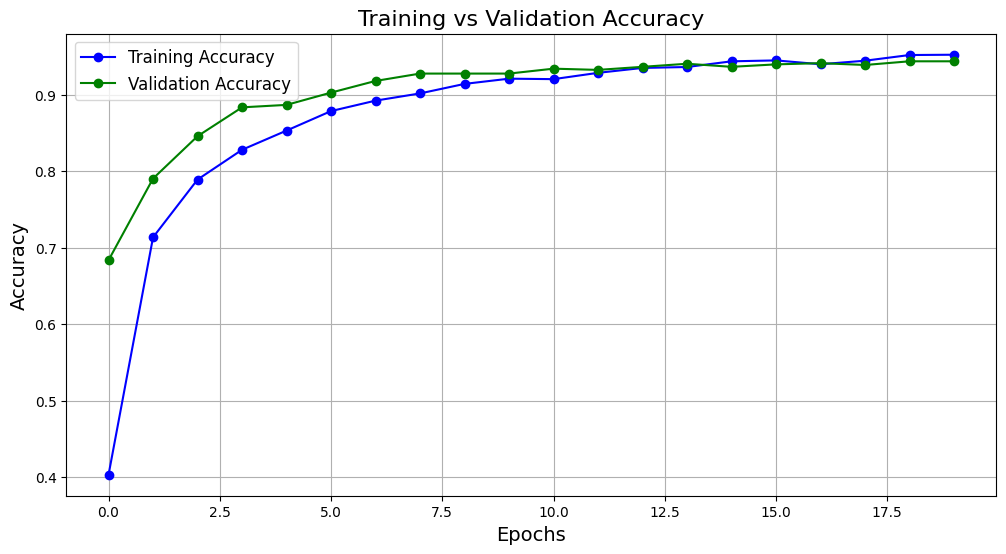

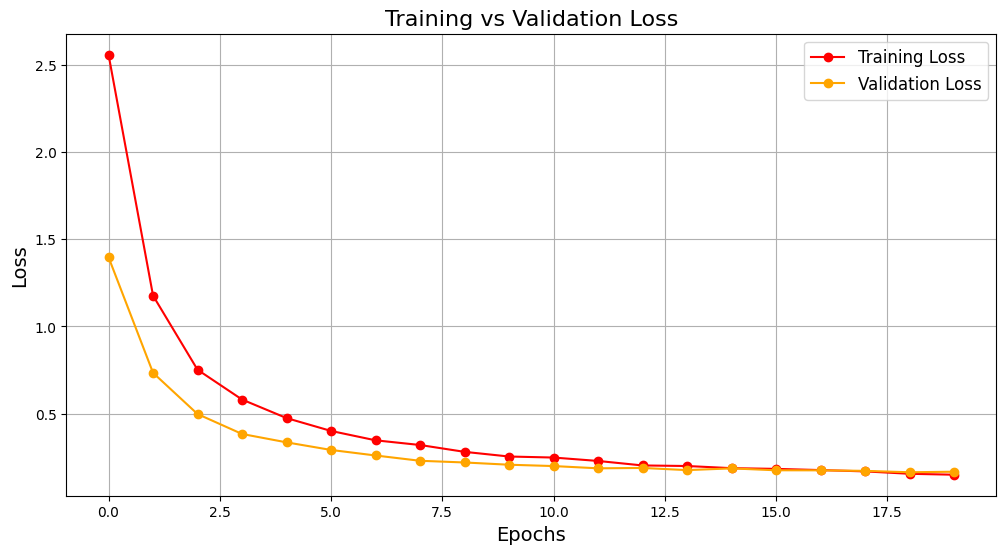

In [ ]:
# Plot Training vs Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green', marker='o')
plt.title('Training vs Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot Training vs Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='red', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='o')
plt.title('Training vs Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
sample_data['predicted_location'] = sample_data['Sentence_Vector'].apply(predict_location)